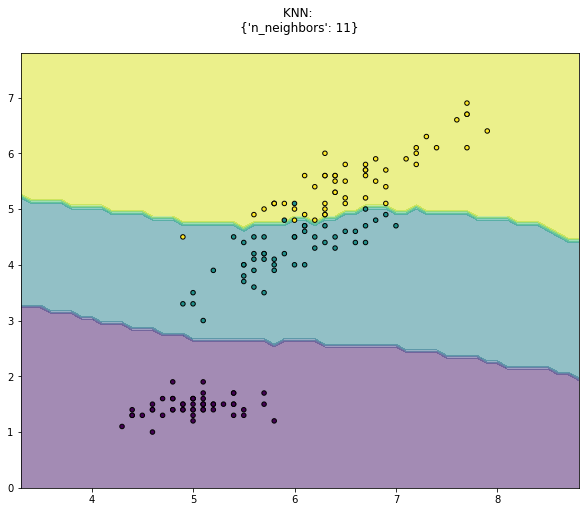

In [140]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict , GridSearchCV, RepeatedStratifiedKFold
from sklearn import datasets


# Loading some example data
iris = datasets.load_iris()
Xl = iris.data[:, [2,3]]
X = iris.data[:, [0, 2]]
y = iris.target



max_class = np.max(np.bincount(y))

grid_param = {'n_neighbors': range(1, max_class)}
model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
clf2 = GridSearchCV(model, grid_param, cv=cv, scoring='accuracy')

clf2.fit(X, y)



x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

clf=clf2

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    
plt.title("KNN: \n{}\n".format(clf.best_params_))
plt.show()